In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.11.18']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
998,Afghanistan,22.11.18,205009
2008,Africa,22.11.18,12407045
3006,Albania,22.11.18,333233
4004,Algeria,22.11.18,270996
4996,Andorra,22.11.18,46824
...,...,...,...
231987,Wallis and Futuna,22.11.18,3415
233020,World,22.11.18,637509459
233973,Yemen,22.11.18,11945
234949,Zambia,22.11.18,333685


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
998,Afghanistan,22.11.18,205009
3006,Albania,22.11.18,333233
4004,Algeria,22.11.18,270996
4996,Andorra,22.11.18,46824
5970,Angola,22.11.18,103131
...,...,...,...
230258,Vietnam,22.11.18,11510919
231987,Wallis and Futuna,22.11.18,3415
233973,Yemen,22.11.18,11945
234949,Zambia,22.11.18,333685


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
222710,United States,22.11.18,98301472
97137,India,22.11.18,44669748
74926,France,22.11.18,37349892
79888,Germany,22.11.18,36205405
29782,Brazil,22.11.18,34999495
197632,South Korea,22.11.18,26512754
105142,Italy,22.11.18,24031538
221678,United Kingdom,22.11.18,23977637
107157,Japan,22.11.18,23626318
174989,Russia,22.11.18,21219827


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
215574,Turkey,22.11.18,16919638
199612,Spain,22.11.18,13573721
160313,Oceania,22.11.18,12847043
230258,Vietnam,22.11.18,11510919
13031,Australia,22.11.18,10555312
...,...,...,...
141549,Montserrat,22.11.18,1403
126117,Macao,22.11.18,795
99145,International,22.11.18,721
228247,Vatican,22.11.18,29


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.11.18', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_2780\2414613313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.11.18', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.11.18,98301472
India,22.11.18,44669748
France,22.11.18,37349892
Germany,22.11.18,36205405
Brazil,22.11.18,34999495
South Korea,22.11.18,26512754
Italy,22.11.18,24031538
United Kingdom,22.11.18,23977637
Japan,22.11.18,23626318


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.11.18,98301472
1,India,22.11.18,44669748
2,France,22.11.18,37349892
3,Germany,22.11.18,36205405
4,Brazil,22.11.18,34999495
5,South Korea,22.11.18,26512754
6,Italy,22.11.18,24031538
7,United Kingdom,22.11.18,23977637
8,Japan,22.11.18,23626318
9,Russia,22.11.18,21219827


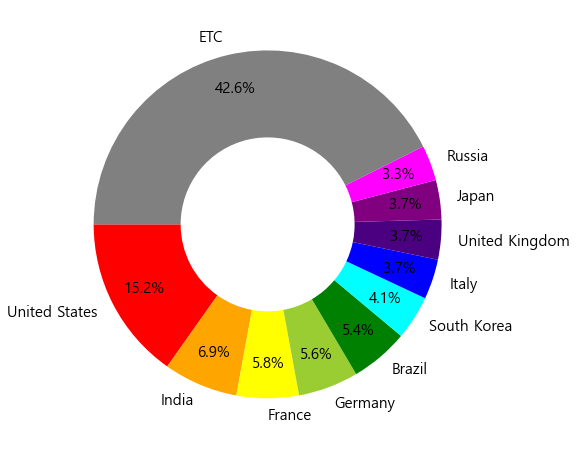

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()